<h1 style='text-align:center; font-weight:1000'>
    Estadística Inferencial
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

## **1. Funciones de muestreo**

In [3]:
df = pd.read_csv('Data/econdata.csv')

In [4]:
df.head(1)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez


### **1.1 Muestreo aleatorio simple**

In [5]:
df.sample(8)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
61,61,"19.4343847692,-99.125125489","{""type"": ""Polygon"", ""coordinates"": [[[-99.1257...",005_140_01,Cuauhtémoc,B,Mercado,Mixcalco
86,86,"19.4244645173,-99.1433325213","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_085_04,Cuautémoc,B,Hotel,San Juan
201,201,"19.4303279904,-99.1362313323","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_041_12,Cuautémoc,A,Hotel,Montecarlo
31,31,"19.4242639147,-99.1311619613","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",307_129_20,Cuautémoc,B,Hotel,Escorial
209,209,"19.4236610108,-99.1437572917","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_087_02,Cuautémoc,B,Hotel,Catalina
184,184,"19.4306993983,-99.1389056387","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_043_01,Cuautémoc,A,Hotel,"La Casa de la Luna, S.A. DE C.V."
228,228,"19.4406567734,-99.1394531646","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_069_01,Cuautémoc,B,Museo,Tequila y Mescal
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz


### **1.2 Muestreo sistemático**

In [6]:
posicion_inicial = 0
posicion_final = len(df)
steps = 3

df.iloc[list(range(posicion_inicial,posicion_final,steps)),:]

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


### **1.3 Muestreo estratificado**

In [7]:
df['category'] = df['delegacion'] + '_' + df['tipo']

In [8]:
pd.DataFrame(round(df['category'].value_counts()/len(df) * 100, 2))

,category
Cuautémoc_Hotel,64.35
Cuautémoc_Museo,15.65
Venustiano Carranza_Hotel,7.83
Cuauhtémoc_Mercado,7.39
Venustiano Carranza_Mercado,4.78


In [9]:
df_est = pd.DataFrame(columns = df.columns)
muestra = 0.25

for i in set(df['category']):
    df_muestra = df.query(f'category == "{i}"').sample(int(muestra * len(df.query(f'category == "{i}"')))).copy()
    df_est = pd.concat([df_est, df_muestra], axis=0)

In [10]:
pd.DataFrame(round(df_est['category'].value_counts()/len(df_est) * 100, 2))

,category
Cuautémoc_Hotel,66.07
Cuautémoc_Museo,16.07
Venustiano Carranza_Hotel,7.14
Cuauhtémoc_Mercado,7.14
Venustiano Carranza_Mercado,3.57


## **2. Estadísticos y cálculos**

In [11]:
iris = sns.load_dataset('iris')

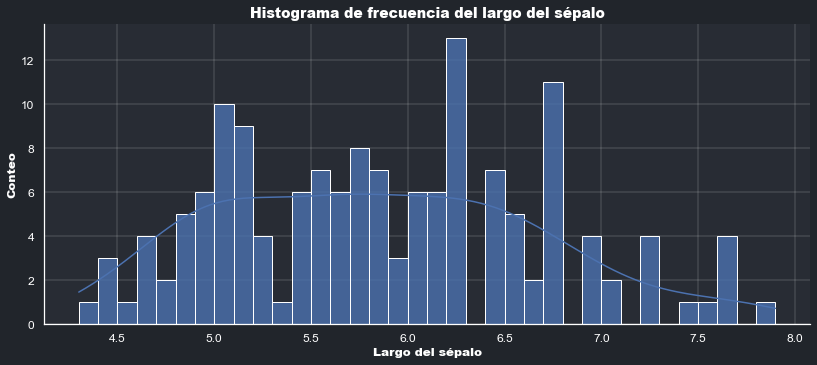

In [99]:
sns.set(rc={'figure.facecolor': '#21252b', 'axes.facecolor': '#282c34'})

sns.displot(data=iris, x='sepal_length', kde=True, alpha=0.8, bins=36, aspect=11.5/5)

plt.title('Histograma de frecuencia del largo del sépalo', fontweight=1000, color='w', fontsize=14)

plt.xlabel('Largo del sépalo', color='w', fontweight=1000)
plt.xticks(color='white', size=12)

plt.ylabel('Conteo', color='w', fontweight=1000)
plt.yticks(color='white', size=12)

plt.grid(linewidth=0.2)

plt.show()

#### **Promedio**

In [109]:
round(iris['sepal_length'].mean(), 2)

5.84

#### **Varianza**

In [107]:
round(iris['sepal_length'].var(), 2)

0.69

#### **Desviación estándar**

In [108]:
round(iris['sepal_length'].std(), 2)

0.83

### **Aplicando muestreo aleatorio simple**

In [114]:
iris_sample = iris.sample(frac=0.5)

#### **Promedio muestral**

In [120]:
iris_sample['sepal_length'].mean()

5.88

#### **Varianza muestral**

In [122]:
round(iris_sample['sepal_length'].var(), 2)

0.74

#### **Desviación estándar muestral**

In [123]:
round(iris_sample['sepal_length'].std(), 2)

0.86